In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly
import getpass
# to split the datasets
from sklearn.model_selection import train_test_split

# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder



In [ ]:
data = pd.read_csv('/content/H-1B_Disclosure_Data_FY2019 (2).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,13,14,20,22,26,27,28,31,32,33,34,35,36,37,38,39,42,43,45,46,47,48,53,54,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,164,166,169,171,172,173,174,175,176,177,178,185,187,190,192,193,194,195,196,197,198,199,206,208,211,213,214,215,216,217,218,219,220,223,225,227,229,232,234,235,236,237,238,239,240,244,246,248,250,253,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# understanding the data

In [ ]:
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
348102,I-200-19150-818917,CERTIFIED,30-05-2019 12:50,05-06-2019 22:01,NaN,H-1B,TABLEAU DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS
348103,I-200-19150-841911,CERTIFIED,30-05-2019 12:51,05-06-2019 22:01,NaN,H-1B,SENIOR SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS
348104,I-200-19150-680787,DENIED,30-05-2019 12:54,31-05-2019 12:47,NaN,H-1B,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS
348105,I-200-19148-791007,CERTIFIED,30-05-2019 12:55,05-06-2019 22:01,NaN,H-1B,DIGITAL SOFTWARE ENGINEER LEAD ANALYST,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
348106,I-200-19150-595267,CERTIFIED,30-05-2019 12:55,05-06-2019 22:01,NaN,H-1B,CLOUD BIG DATA ARCHITECT,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(348107, 260)

In [ ]:
data.describe()

,TOTAL_WORKER_POSITIONS,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,NAICS_CODE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS_1,PREVAILING_WAGE_1,...,PW_SURVEY_PUBLISHER_9,WORKSITE_WORKERS_10,WORKSITE_POSTAL_CODE_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_RATE_OF_PAY_TO_10,PREVAILING_WAGE_10,PW_TRACKING_NUMBER_10,PW_OES_YEAR_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10
count,348105.000000,348107.000000,348106.000000,348107.000000,348107.000000,348106.000000,2.177330e+05,1.997500e+04,298075.000000,329560.000000,...,1.0,31.000000,31.000000,31.000000,11.000000,31.000000,0.0,1.0,30.000000,1.0
mean,1.518786,0.106424,0.012117,0.216603,0.212033,453038.532519,5.923705e+09,4.446625e+04,4.509446,87084.956569,...,2018.0,8.225806,63397.193548,101092.612903,143017.818182,82664.806452,NaN,2018.0,2018.133333,2018.0
std,3.661811,0.780469,0.286318,0.935927,0.833684,184562.176169,2.178888e+10,1.488133e+06,491.867414,34288.231260,...,NaN,7.112007,26102.784442,20964.163435,39761.109295,19649.657720,NaN,NaN,0.434172,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,1111.000000,3.300000e+01,0.000000e+00,1.000000,8.000000,...,2018.0,1.000000,6002.000000,64771.000000,87000.000000,61235.000000,NaN,2018.0,2018.000000,2018.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,512110.000000,3.037647e+09,1.040000e+02,1.000000,73798.000000,...,2018.0,1.000000,43212.000000,89261.000000,112500.000000,66487.000000,NaN,2018.0,2018.000000,2018.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,541511.000000,4.169435e+09,1.540000e+02,1.000000,86029.000000,...,2018.0,15.000000,75201.000000,94557.000000,145000.000000,77189.000000,NaN,2018.0,2018.000000,2018.0
75%,1.000000,0.000000,0.000000,0.000000,0.000000,541512.000000,7.132299e+09,2.910000e+02,1.000000,104187.000000,...,2018.0,15.000000,85003.000000,114421.000000,168832.000000,91832.000000,NaN,2018.0,2018.000000,2018.0
max,594.000000,338.000000,99.000000,99.000000,99.000000,928120.000000,9.737040e+11,2.001220e+08,160500.000000,506424.000000,...,2018.0,15.000000,94117.000000,160890.000000,212900.000000,135595.000000,NaN,2018.0,2020.000000,2018.0


In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS_1,SECONDARY_ENTITY_1,SECONDARY_ENTITY_BUSINESS_NAME_1,WORKSITE_ADDRESS1_1,WORKSITE_ADDRESS2_1,WORKSITE_CITY_1,WORKSITE_COUNTY_1,WORKSITE_STATE_1,WORKSITE_POSTAL_CODE_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,PW_TRACKING_NUMBER_1,PW_WAGE_LEVEL_1,PW_OES_YEAR_1,PW_OTHER_SOURCE_1,PW_NON-OES_YEAR_1,PW_SURVEY_PUBLISHER_1,PW_SURVEY_NAME_1,WORKSITE_WORKERS_2,SECONDARY_ENTITY_2,SECONDARY_ENTITY_BUSINESS_NAME_2,WORKSITE_ADDRESS1_2,WORKSITE_ADDRESS2_2,WORKSITE_CITY_2,WORKSITE_COUNTY_2,WORKSITE_STATE_2,WORKSITE_POSTAL_CODE_2,WAGE_RATE_OF_PAY_FROM_2,WAGE_RATE_OF_PAY_TO_2,WAGE_UNIT_OF_PAY_2,PREVAILING_WAGE_2,PW_UNIT_OF_PAY_2,PW_TRACKING_NUMBER_2,PW_WAGE_LEVEL_2,PW_OES_YEAR_2,PW_OTHER_SOURCE_2,PW_NON-OES_YEAR_2,PW_SURVEY_PUBLISHER_2,PW_SURVEY_NAME_2,WORKSITE_WORKERS_3,SECONDARY_ENTITY_3,SECONDARY_ENTITY_BUSINESS_NAME_3,WORKSITE_ADDRESS1_3,WORKSITE_ADDRESS2_3,WORKSITE_CITY_3,WORKSITE_COUNTY_3,WORKSITE_STATE_3,WORKSITE_POSTAL_CODE_3,WAGE_RATE_OF_PAY_FROM_3,WAGE_RATE_OF_PAY_TO_3,WAGE_UNIT_OF_PAY_3,PREVAILING_WAGE_3,PW_UNIT_OF_PAY_3,PW_TRACKING_NUMBER_3,PW_WAGE_LEVEL_3,PW_OES_YEAR_3,PW_OTHER_SOURCE_3,PW_NON-OES_YEAR_3,PW_SURVEY_PUBLISHER_3,PW_SURVEY_NAME_3,WORKSITE_WORKERS_4,SECONDARY_ENTITY_4,SECONDARY_ENTITY_BUSINESS_NAME_4,WORKSITE_ADDRESS1_4,WORKSITE_ADDRESS2_4,WORKSITE_CITY_4,WORKSITE_COUNTY_4,WORKSITE_STATE_4,WORKSITE_POSTAL_CODE_4,WAGE_RATE_OF_PAY_FROM_4,WAGE_RATE_OF_PAY_TO_4,WAGE_UNIT_OF_PAY_4,PREVAILING_WAGE_4,PW_UNIT_OF_PAY_4,PW_TRACKING_NUMBER_4,PW_WAGE_LEVEL_4,PW_OES_YEAR_4,PW_OTHER_SOURCE_4,PW_NON-OES_YEAR_4,PW_SURVEY_PUBLISHER_4,PW_SURVEY_NAME_4,WORKSITE_WORKERS_5,SECONDARY_ENTITY_5,SECONDARY_ENTITY_BUSINESS_NAME_5,WORKSITE_ADDRESS1_5,WORKSITE_ADDRESS2_5,WORKSITE_CITY_5,WORKSITE_COUNTY_5,WORKSITE_STATE_5,WORKSITE_POSTAL_CODE_5,WAGE_RATE_OF_PAY_FROM_5,WAGE_RATE_OF_PAY_TO_5,WAGE_UNIT_OF_PAY_5,PREVAILING_WAGE_5,PW_UNIT_OF_PAY_5,PW_TRACKING_NUMBER_5,PW_WAGE_LEVEL_5,PW_OES_YEAR_5,PW_OTHER_SOURCE_5,PW_NON-OES_YEAR_5,PW_SURVEY_PUBLISHER_5,PW_SURVEY_NAME_5,WORKSITE_WORKERS_6,SECONDARY_ENTITY_6,SECONDARY_ENTITY_BUSINESS_NAME_6,WORKSITE_ADDRESS1_6,WORKSITE_ADDRESS2_6,WORKSITE_CITY_6,WORKSITE_COUNTY_6,WORKSITE_STATE_6,WORKSITE_POSTAL_CODE_6,WAGE_RATE_OF_PAY_FROM_6,WAGE_RATE_OF_PAY_TO_6,WAGE_UNIT_OF_PAY_6,PREVAILING_WAGE_6,PW_UNIT_OF_PAY_6,PW_TRACKING_NUMBER_6,PW_WAGE_LEVEL_6,PW_OES_YEAR_6,PW_OTHER_SOURCE_6,PW_NON-OES_YEAR_6,PW_SURVEY_PUBLISHER_6,PW_SURVEY_NAME_6,WORKSITE_WORKERS_7,SECONDARY_ENTITY_7,SECONDARY_ENTITY_BUSINESS_NAME_7,WORKSITE_ADDRESS1_7,WORKSITE_ADDRESS2_7,WORKSITE_CITY_7,WORKSITE_COUNTY_7,WORKSITE_STATE_7,WORKSITE_POSTAL_CODE_7,WAGE_RATE_OF_PAY_FROM_7,WAGE_RATE_OF_PAY_TO_7,WAGE_UNIT_OF_PAY_7,PREVAILING_WAGE_7,PW_UNIT_OF_PAY_7,PW_TRACKING_NUMBER_7,PW_WAGE_LEVEL_7,PW_OES_YEAR_7,PW_OTHER_SOURCE_7,PW_NON-OES_YEAR_7,PW_SURVEY_PUBLISHER_7,PW_SURVEY_NAME_7,WORKSITE_WORKERS_8,SECONDARY_ENTITY_8,SECONDARY_ENTITY_BUSINESS_NAME_8,WORKSITE_ADDRESS1_8,WORKSITE_ADDRESS2_8,WORKSITE_CITY_8,WORKSITE_COUNTY_8,WORKSITE_STATE_8,WORKSITE_POSTAL_CODE_8,WAGE_RATE_OF_PAY_FROM_8,WAGE_RATE_OF_PAY_TO_8,WAGE_UNIT_OF_PAY_8,PREVAI

In [ ]:
data = data[data.VISA_CLASS == 'H-1B']

In [ ]:
data.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    145411
CANADA                           7
INDIA                            3
TURKEY                           1
Name: EMPLOYER_COUNTRY, dtype: int64

In [ ]:
data= data[data.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']

In [ ]:
data.apply(lambda x:len(x.unique()))

CASE_NUMBER           145411
CASE_STATUS                4
CASE_SUBMITTED         95355
DECISION_DATE           3839
ORIGINAL_CERT_DATE       727
                       ...  
WILLFUL_VIOLATOR           3
SUPPORT_H1B                3
STATUTORY_BASIS            4
MASTERS_EXEMPTION          2
PUBLIC_DISCLOSURE          4
Length: 260, dtype: int64

In [ ]:
data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION',
       ...
       'PW_OTHER_SOURCE_10', 'PW_NON-OES_YEAR_10', 'PW_SURVEY_PUBLISHER_10',
       'PW_SURVEY_NAME_10', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'SUPPORT_H1B', 'STATUTORY_BASIS', 'MASTERS_EXEMPTION',
       'PUBLIC_DISCLOSURE'],
      dtype='object', length=260)

In [ ]:
data.nunique()

CASE_NUMBER           348107
CASE_STATUS                4
CASE_SUBMITTED        170160
DECISION_DATE           5372
ORIGINAL_CERT_DATE      1989
                       ...  
WILLFUL_VIOLATOR           2
SUPPORT_H1B                2
STATUTORY_BASIS            3
MASTERS_EXEMPTION          2
PUBLIC_DISCLOSURE          3
Length: 260, dtype: int64

In [ ]:
data['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [ ]:
# cleaning data

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0]


ORIGINAL_CERT_DATE        142145
TOTAL_WORKER_POSITIONS         1
EMPLOYER_NAME                  1
EMPLOYER_BUSINESS_DBA     136692
EMPLOYER_ADDRESS2          83690
                           ...  
WILLFUL_VIOLATOR               3
SUPPORT_H1B                83321
STATUTORY_BASIS            89347
MASTERS_EXEMPTION         145169
PUBLIC_DISCLOSURE           1173
Length: 238, dtype: int64

**SELECTING RELEVANT FEATURES**

In [ ]:
to_select = ['CASE_NUMBER', 'CASE_STATUS', 'PERIOD_OF_EMPLOYMENT_START_DATE','EMPLOYER_NAME', 'EMPLOYER_STATE','JOB_TITLE',
             'SOC_TITLE','FULL_TIME_POSITION','PREVAILING_WAGE_1','PW_UNIT_OF_PAY_1','WORKSITE_STATE_1']

In [ ]:
data = data[to_select]
data.head()

,CASE_NUMBER,CASE_STATUS,PERIOD_OF_EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,SOC_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,WORKSITE_STATE_1
6,I-200-18289-307616,WITHDRAWN,03/07/2019,MH SUB I LLC,CA,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,Y,97365.0,Year,CA
7,I-200-19015-877040,WITHDRAWN,27-05-2019,"KIIP, INC.",CA,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,Y,131685.0,Year,CALIFORNIA
8,I-200-19031-693896,WITHDRAWN,23-02-2019,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",CA,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,Y,97365.0,Year,CALIFORNIA
9,I-200-19056-659352,WITHDRAWN,01-09-2019,"SOLAREDGE TECHNOLOGIES, INC.",CA,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,Y,126901.0,Year,CALIFORNIA
10,I-200-19066-002723,WITHDRAWN,06-09-2019,SOULSIGHT,IL,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,Y,47549.0,Year,ILLINOIS


In [ ]:
# relationship analysis

In [ ]:
data.SOC_CODE.isnull().describe()

count     348107
unique         1
top        False
freq      348107
Name: SOC_CODE, dtype: object

In [ ]:
data.SOC_CODE.nunique()


101

In [ ]:
data.CASE_STATUS.isnull().sum()

0

In [ ]:
data.WILLFUL_VIOLATOR.isnull().sum()


8424

In [ ]:
data.WILLFUL_VIOLATOR.unique()


array(['N', nan, 'Y'], dtype=object)

In [ ]:
data.WILLFUL_VIOLATOR.value_counts()

N    339517
Y       166
Name: WILLFUL_VIOLATOR, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


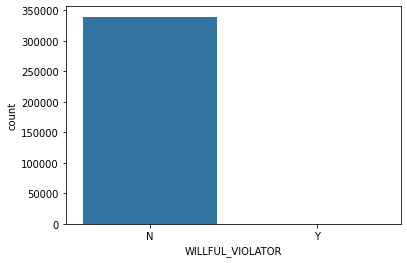

In [ ]:
import seaborn as sns
sns.countplot(data.WILLFUL_VIOLATOR)

In [ ]:
data = data[((data['CASE_STATUS'].str.upper() == 'CERTIFIED') | \
                               (data['CASE_STATUS'].str.upper() == 'DENIED')) & \
                              (data['VISA_CLASS'].str.upper() == 'H-1B')]  
    

In [ ]:
data = data[data.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']
print('There are {} records.'.format(data.shape[0]))

There are 24339 records.


In [ ]:
def jobClassifier(SOC_CODE, SOC_MAP):
    soc_map = SOC_MAP
    soc = str(SOC_CODE).split('-')[0]        
    return soc_map.get(soc,'OTHER')

([0, 1], <a list of 2 Text major ticklabel objects>)

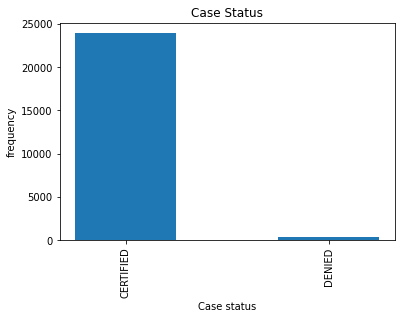

In [ ]:
data.CASE_STATUS.value_counts()
plt.bar(data['CASE_STATUS'].value_counts().index, data['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=data)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')


**DISTRIBUTION OF VISA CASES WITH THE COMPANIES -**

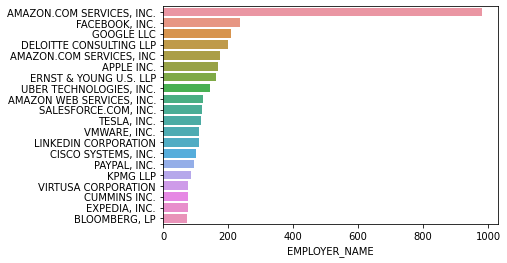

In [ ]:
data['EMPLOYER_NAME'].value_counts()
sns.barplot(x = data['EMPLOYER_NAME'].value_counts()[:20], y = data['EMPLOYER_NAME'].value_counts().index[:20])


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

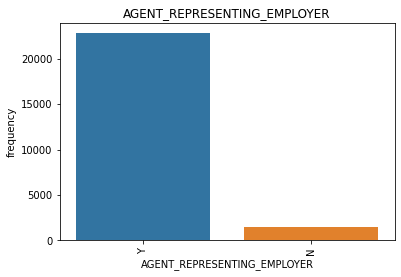

In [ ]:
data['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = data['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = data['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')


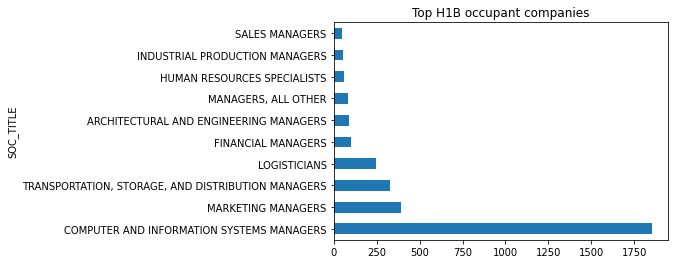

In [ ]:
top_occup = data.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_occup_H1B_visa = data.loc[data.EMPLOYER_NAME.isin(top_occup)]
top_occup_H1B_visa.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Top H1B occupant companies')


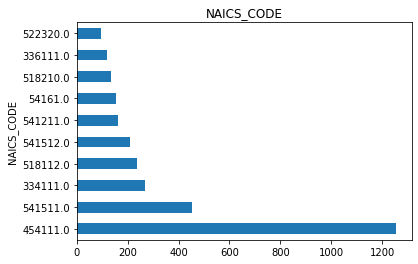

In [ ]:
top_NAICS_CODE = data.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_NAICS_CODE_H1B_visa = data.loc[data.EMPLOYER_NAME.isin(top_NAICS_CODE)]
top_NAICS_CODE_H1B_visa.groupby('NAICS_CODE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='NAICS_CODE')

In [ ]:
data.groupby(['TOTAL_WORKER_POSITIONS','WAGE_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']


count           mean  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                           
1.0                    Bi-Weekly               4.0    3778.500000   
                       Hour                 1454.0     968.468088   
                       Month                  27.0   39250.755926   
                       Week                    3.0    1136.006667   
                       Year                21464.0  118811.345179   
2.0                    Hour                   10.0   12144.672000   
                       Year                  129.0  131516.232558   
3.0                    Hour                    3.0      44.380000   
                       Year                  217.0  118421.202765   
4.0                    Year                    9.0   98966.111111   
5.0                    Hour                    2.0      27.385000   
                       Year                  101.0  138918.653465   
6.0                    Year                   13.0  100644.769231   
7.0                    Year                    1.0   68224.000000   
10.0                   Hour                   16.0      55.465625   
                       Year                  277.0  137210.444043   
12.0                   Year                   13.0  167613.538462   
15.0                   Year                   64.0  128734.890625   
20.0                   Year                   91.0  156810.384615   
24.0                   Year                    3.0  131367.000000   
25.0                   Year                  119.0  142071.168067   
30.0                   Year                   47.0  154963.276596   
50.0                   Year                   52.0  155606.307692   
75.0                   Year                   24.0  140003.083333   
100.0                  Year                    1.0  145267.000000   
110.0                  Year                    1.0  212181.000000   

                                                    std        min  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0                    Bi-Weekly            1598.809036    2500.00   
                       Hour                 9299.724436      10.42   
                       Month               49335.549565      15.23   
                       Week                 1083.408381      22.02   
                       Year                45223.793529      16.11   
2.0                    Hour                38268.950000      20.44   
                       Year                53378.710472   40019.00   
3.0                    Hour                    3.793191      40.00   
                       Year                29588.328118   43285.00   
4.0                    Year                37661.400178   44637.00   
5.0                    Hour                    3.698168      24.77   
                       Year                47867.707794   38501.00   
6.0                    Year                41465.242123   51043.00   
7.0                    Year                         NaN   68224.00   
10.0                   Hour                   16.601736      23.84   
                       Year                40883.809587   51043.00   
12.0                   Year                50386.441163   57512.00   
15.0                   Year                31960.419593   79747.00   
20.0                   Year                39393.122388   57470.00   
24.0                   Year                31191.398350   98342.00   
25.0                   Year                37137.070766   56222.00   
30.0                   Year                28974.503511   85758.00   
50.0                   Year                39105.740691   79914.00   
75.0                   Year                46691.732179   73632.00   
100.0                  Year                         NaN  145267.00   
110.0                  Year                         NaN  212181.00   

                                                   25%         50%  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0        

**WAGE DISTRIBUTION**

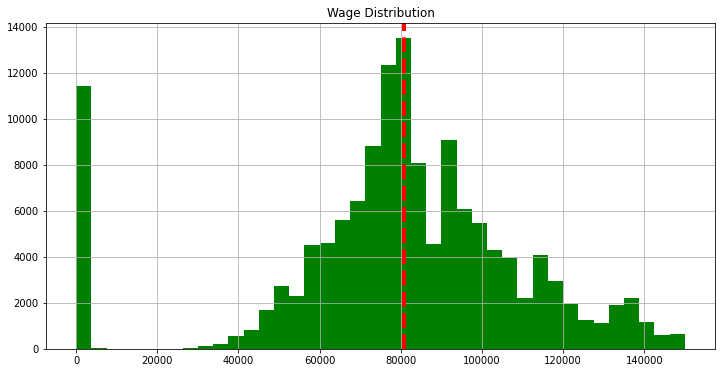

In [ ]:
plt.figure(figsize=(12,6))
data[data['PREVAILING_WAGE_1']<150000].PREVAILING_WAGE_1.hist(bins=40,color='green')
plt.axvline(data[data['PREVAILING_WAGE_1']<=150000].PREVAILING_WAGE_1.median(), color='red', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

Imputing and dealing with null values

**DEALING WITH MISSING DATA**

Check for columns with missing values, and the number of missing values of each column.

In [ ]:
#Mcar(missing completely at random values)
data[data['WILLFUL_VIOLATOR'].isnull()]


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,COMPUTER SYSTEMS ANALYST,COMPUTER SYSTEMS ANALYSTS,ACCOUNTANTS AND AUDITORS,MANAGEMENT ANALYSTS,FINANCIAL ANALYSTS,COMPUTER AND INFORMATION SYSTEMS MANAGERS,MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,"FINANCIAL SPECIALISTS, ALL OTHER",MARKETING MANAGERS
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,0,0,0,0,0,0,0,0,0,0
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,0,0,0,0,0,0,0,0,0,0
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,0,0,0,0,0,0,0,0,0,0
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,0,0,0,0,0,0,0,0,0,0
13,I-203-19254-065679,WITHDRAWN,11-09-2019 08:50,11-09-2019,NaN,E-3 Australian,"VP, PRODUCTION",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107180,I-203-19044-288607,CERTIFIED,14-02-2019 01:32,21-02-2019 22:00,NaN,E-3 Australian,TECHNOLOGY LEAD - US,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,...,0,1,0,0,0,0,0,0,0,0
107613,I-203-19043-100829,CERTIFIED,14-02-2019 10:51,21-02-2019 22:00,NaN,E-3 Australian,BUSINESS ANALYST SPECIALIST,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,...,0,1,0,0,0,0,0,0,0,0
109468,I-203-19045-951815,CERTIFIED,19-02-2019 21:09,25-02-2019 22:02,NaN,E-3 Australian,HEAD OF GRADUATE PROGRAM AND PRODUCT ENGINEER,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,...,0,1,0,0,0,0,0,0,0,0
109579,I-203-19050-213876,CERTIFIED,20-02-2019 00:20,26-02-2019 22:00,NaN,E-3 Australian,TECHNOLOGY LEAD - US,15-1121,COMPUTER SYSTEMS ANALYSTS,Y,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
data['PUBLIC_DISCLOSURE ']=np.where(data['PUBLIC_DISCLOSURE'].isnull(),1,0)
# finding percentage of null values
data['PUBLIC_DISCLOSURE '].mean()

0.05830388692579505

In [ ]:
data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION',
       ...
       'COMPUTER SYSTEMS ANALYSTS', 'ACCOUNTANTS AND AUDITORS',
       'MANAGEMENT ANALYSTS', 'FINANCIAL ANALYSTS',
       'COMPUTER AND INFORMATION SYSTEMS MANAGERS',
       'MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS',
       'COMPUTER AND INFORMATION RESEARCH SCIENTISTS',
       'FINANCIAL SPECIALISTS, ALL OTHER', 'MARKETING MANAGERS',
       'PUBLIC_DISCLOSURE '],
      dtype='object', length=271)

Imputing missing data for important columns.

In [ ]:

# There are situations where a company does not set levels for WAGE_RATE_OF_PAY_TO_10 . Catagorize these companies together.
# Adding a new catagory to 'PW_OES_YEAR_10' and 'PW_NON-OES_YEAR_10' as 'Not known'
data['WAGE_RATE_OF_PAY_TO_10'].fillna('No Answer',inplace = True)
data['PREVAILING_WAGE_10'].fillna('No Level',inplace = True)
data['PW_OES_YEAR_10'].fillna('Not known',inplace = True)
data['PW_NON-OES_YEAR_10'].fillna('Not known',inplace = True)


**techniques of handling missing values**

In [ ]:
# handling missing values by mean,median mode imputation



**ONE HOT ENCODING**

In [ ]:
#lets have look how many labels each column has
for col in data.columns:
  print(col,':',len(data[col].unique()),'labels')

CASE_NUMBER : 305483 labels
CASE_STATUS : 2 labels
CASE_SUBMITTED : 158953 labels
DECISION_DATE : 4809 labels
ORIGINAL_CERT_DATE : 1 labels
VISA_CLASS : 1 labels
JOB_TITLE : 49397 labels
SOC_CODE : 95 labels
SOC_TITLE : 190 labels
FULL_TIME_POSITION : 2 labels
PERIOD_OF_EMPLOYMENT_START_DATE : 780 labels
PERIOD_OF_EMPLOYMENT_END_DATE : 2281 labels
TOTAL_WORKER_POSITIONS : 50 labels
NEW_EMPLOYMENT : 53 labels
CONTINUED_EMPLOYMENT : 25 labels
CHANGE_PREVIOUS_EMPLOYMENT : 14 labels
NEW_CONCURRENT_EMPLOYMENT : 9 labels
CHANGE_EMPLOYER : 18 labels
AMENDED_PETITION : 14 labels
EMPLOYER_NAME : 34291 labels
EMPLOYER_BUSINESS_DBA : 4835 labels
EMPLOYER_ADDRESS1 : 30531 labels
EMPLOYER_ADDRESS2 : 5063 labels
EMPLOYER_CITY : 3008 labels
EMPLOYER_STATE : 57 labels
EMPLOYER_POSTAL_CODE : 6454 labels
EMPLOYER_COUNTRY : 5 labels
EMPLOYER_PROVINCE : 185 labels
EMPLOYER_PHONE : 41534 labels
EMPLOYER_PHONE_EXT : 670 labels
NAICS_CODE : 1651 labels
AGENT_REPRESENTING_EMPLOYER : 3 labels
AGENT_ATTORNEY_LA

In [ ]:
# let us examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data,drop_first=True).shape 

In [ ]:
# let us find top 10 most frequent categories for the variable SOC_TITLE

data.SOC_TITLE.value_counts().sort_values(ascending=False).head(20)

COMPUTER SYSTEMS ANALYST                              15105
COMPUTER SYSTEMS ANALYSTS                             12598
ACCOUNTANTS AND AUDITORS                              10990
MANAGEMENT ANALYSTS                                   10279
FINANCIAL ANALYSTS                                     9820
COMPUTER AND INFORMATION SYSTEMS MANAGERS              9455
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     6569
COMPUTER AND INFORMATION RESEARCH SCIENTISTS           4407
FINANCIAL SPECIALISTS, ALL OTHER                       3930
MARKETING MANAGERS                                     3004
LOGISTICIANS                                           2013
FINANCIAL MANAGERS                                     1900
ARCHITECTURAL AND ENGINEERING MANAGERS                 1867
GENERAL AND OPERATIONS MANAGERS                        1680
COMPLIANCE OFFICERS                                    1272
HUMAN RESOURCES SPECIALISTS                            1166
MANAGERS, ALL OTHER                     

In [ ]:
# let us make the list with the most frequent categories of the variable
top_10=[x for x in data.SOC_TITLE.value_counts().sort_values(ascending=False).head(10).index]
top_10

['COMPUTER SYSTEMS ANALYST',
 'COMPUTER SYSTEMS ANALYSTS',
 'ACCOUNTANTS AND AUDITORS',
 'MANAGEMENT ANALYSTS',
 'FINANCIAL ANALYSTS',
 'COMPUTER AND INFORMATION SYSTEMS MANAGERS',
 'MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS',
 'COMPUTER AND INFORMATION RESEARCH SCIENTISTS',
 'FINANCIAL SPECIALISTS, ALL OTHER',
 'MARKETING MANAGERS']

In [ ]:
# now we make the 10 binary variables
for label in top_10:
   data[label]=np.where(data['SOC_TITLE']==label,1,0)
data[['SOC_TITLE']+top_10].head(40)

,SOC_TITLE,COMPUTER SYSTEMS ANALYST,COMPUTER SYSTEMS ANALYSTS,ACCOUNTANTS AND AUDITORS,MANAGEMENT ANALYSTS,FINANCIAL ANALYSTS,COMPUTER AND INFORMATION SYSTEMS MANAGERS,MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS,COMPUTER AND INFORMATION RESEARCH SCIENTISTS,"FINANCIAL SPECIALISTS, ALL OTHER",MARKETING MANAGERS
0,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
1,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
2,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
3,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
4,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
5,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
6,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
7,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
8,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0
9,ADVERTISING AND PROMOTIONS MANAGERS,0,0,0,0,0,0,0,0,0,0


**INTEGER ENCODING**

In [ ]:
data = pd.read_csv('/content/H-1B_Disclosure_Data_FY2019 (2).csv',
    usecols=['CASE_NUMBER',	'CASE_STATUS',	'CASE_SUBMITTED'])

data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED
0,I-200-16092-327771,WITHDRAWN,08-04-2016
1,I-203-17188-450729,WITHDRAWN,14-07-2017
2,I-203-17229-572307,WITHDRAWN,23-08-2017
3,I-203-17356-299648,WITHDRAWN,22-12-2017
4,I-203-18008-577576,WITHDRAWN,10-01-2018


In [ ]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

CASE_NUMBER :  157897  labels
CASE_STATUS :  4  labels
CASE_SUBMITTED :  101028  labels


In [ ]:
# let us explore the unique categories
data['CASE_NUMBER'].unique()

array(['I-200-16092-327771', 'I-203-17188-450729', 'I-203-17229-572307',
       ..., 'I-200-19059-667676', 'I-200-19059-448191',
       'I-200-19059-267312'], dtype=object)

In [ ]:
data['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [ ]:
data['CASE_SUBMITTED'].unique()

array(['08-04-2016', '14-07-2017', '23-08-2017', ..., '28-02-2019 03:31',
       '28-02-2019 05:35', '28-02-2019 06:46'], dtype=object)

**Feature Categorisation Functions**

In [ ]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [ ]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [ ]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

**DATA SELECTION**

Selecting colums we want and check for null values

In [ ]:
to_select = ['CASE_STATUS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
             'PERIOD_OF_EMPLOYMENT_START_DATE', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'FULL_TIME_POSITION',
             'NEW_CONCURRENT_EMPLOYMENT', 'PREVAILING_WAGE_1', 'CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT', 
             'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR',
             'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1']
 
#to_remove=['PW_WAGE_LEVEL','PW_SOURCE_OTHER','AGENT_ATTORNEY_NAME', 'EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE', 'EMPLOYER_PHONE_EXT','EMPLOYER_PHONE','WORKSITE_POSTAL_CODE','EMPLOYER_ADDRESS','EMPLOYER_PHONE','ORIGINAL_CERT_DATE','EMPLOYER_BUSINESS_DBA','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE']
data = data[to_select]
data.isnull().sum()[data.isnull().sum() > 0]

EMPLOYER_NAME                          5
SECONDARY_ENTITY_1                 18756
AGENT_REPRESENTING_EMPLOYER         5209
PERIOD_OF_EMPLOYMENT_START_DATE        1
SOC_TITLE                              1
SOC_CODE                               1
NAICS_CODE                             2
FULL_TIME_POSITION                     1
NEW_CONCURRENT_EMPLOYMENT              1
PREVAILING_WAGE_1                   6470
CONTINUED_EMPLOYMENT                   1
CHANGE_PREVIOUS_EMPLOYMENT             1
CHANGE_EMPLOYER                        1
AMENDED_PETITION                       1
H-1B_DEPENDENT                      7044
SUPPORT_H1B                        82707
WILLFUL_VIOLATOR                    7046
WAGE_RATE_OF_PAY_FROM_1                3
WAGE_UNIT_OF_PAY_1                     3
dtype: int64

**DROPPING USELESS COLUMNS**

By examining the above two columns we can remove all the useless columns which has majority of null values in it. Since we have a lot of those columns to drop, we will instead select the ones we need.

Dropping missing values since now only a few values are null (< 0.007%) in the required rows, we can drop them

In [ ]:
data.dropna(inplace=True)
len(data)

24140

**RESHAPING DATA**

In [ ]:
data.groupby(['FULL_TIME_POSITION','WAGE_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']

count          mean           std  \
FULL_TIME_POSITION WAGE_UNIT_OF_PAY_1                                        
N                  Hour                  153.0     36.482484     13.182959   
Y                  Hour                 1866.0    362.959421   5354.869134   
                   Month                   7.0  76487.428571  18881.443641   
                   Year                22114.0  88509.070860  24115.831770   

                                            min         25%       50%  \
FULL_TIME_POSITION WAGE_UNIT_OF_PAY_1                                   
N                  Hour                   22.30     28.0500     32.04   
Y                  Hour                   18.85     36.7275     39.08   
                   Month               56826.00  65665.5000  75150.00   
                   Year                22922.00  75150.0000  81994.00   

                                            75%        max  
FULL_TIME_POSITION WAGE_UNIT_OF_PAY_1                       
N                  Hour                   38.40      90.78  
Y                  Hour                   45.02  135000.00  
                   Month               79164.50  113776.00  
                   Year                95763.00  254333.00

**HANDLING CATEGORICAL FEATURES**